This lab is presented with slight revisions from [Dennis Sun at Cal Poly](https://web.calpoly.edu/~dsun09/index.html) and his [Data301 Course](http://users.csc.calpoly.edu/~dsun09/data301/lectures.html)

### Note that you should save when you are done, you will submit this file via Canvas as Lab03.

# 1.3 Visualizing Variables

The classic expression, "A picture is worth a thousand words," applies to data science. A graphic usually conveys more information (and more efficiently) than the summary statistics we examined in the previous section. In this section, you will learn how to produce simple graphics for quantitative and categorical variables.

## Graphics in the Jupyter Notebook

By default, Python outputs graphics to a new window. But what if we want a record of the graphic? We could save the graphic to an image file, but then the graphic and the code that generated it would live in different files. If these files were to ever get separated, then it may be difficult to regenerate the graphic. In other words, the standard Python workflow is not **reproducible**.

Jupyter notebooks support a reproducible workflow, by allowing graphics to be embedded directly in a notebook. Now, the graphic and the code that generated it live in the same file, adjacent to one another. To make graphics show up in the Jupyter notebook, we have to specify that `matplotlib` (the main graphics library in Python) should output the graphic to the "inline" backend, as opposed to, for example, a backend that makes the graphic appear in a new window. To specify a backend for `matplotlib`, we run a so-called **magic command** (or just **magic**, for short). Magic commands modify the behavior of a notebook or an individual cell. For example, the `%timeit` magic, which we will use later in this book, times how long it takes to run a line of code. You can recognize magics because they are preceded by `%` or `%%`. For a full list of magics, consult [the documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

The `%matplotlib` magic below allows you to specify a backend. In general, if you plan to create graphics in the Jupyter notebook, then the following magic should be the first line in your notebook.

In [3]:
%matplotlib inline

## Visualizing Quantitative Variables

Graphics can help us understand how the values of a quantitative variable are distributed. We will study two types of visualizations for quantitative variables: histograms and densities.

### Histograms

The standard visualization for a single quantitative variable is the **histogram**. A histogram sorts the values into bins and uses bars to represent the number of values in each bin.

To make a histogram, we call the `.plot.hist()` method of the selected variable. All of the plotting functions in `pandas` are preceded by `.plot`.

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


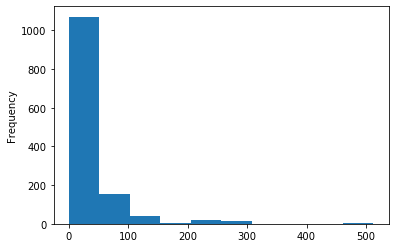

In [4]:
import pandas as pd
df = pd.read_csv("./data/titanic.csv")
display(df[0:5])
df.fare.plot.hist()

It seems that we did not get enough resolution to really determine what is going on at the lower end of the scale. Let's request more bins.

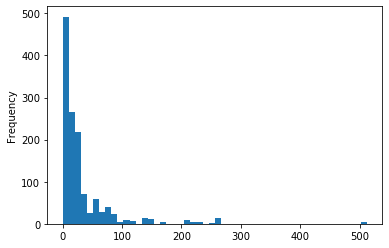

In [5]:
df.fare.plot.hist(bins=50)

From this graph, we see a concentration of values around 10-30 (which we previously identified as the "center") and a spread of about 30-50 (which we previously identified as the "spread"). We also see the outlier who paid more than £500. We also see features that were not obvious before: the skewed shape of the distribution, the gap between £300 and £500, and so on. This single picture has managed to convey more information than a dozen summary statistics.

We might want to plot more than one histogram on the same graphic to make for easy comparison. To do this, we simply make multiple calls to plotting functions within the same cell. For example, if we wanted to compare the distributions of the number of siblings/spouses and the number of parents/children that accompanied passengers, we could call `.plot.hist()` twice.

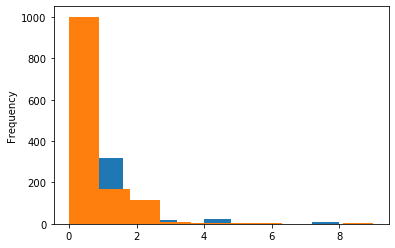

In [6]:
df.sibsp.plot.hist()
df.parch.plot.hist()

Notice that `pandas` automatically plotted the two histograms using different colors. There are two problems with this plot. First, we don't know which color corresponds to which variable. Second, we cannot see the blue histogram underneath the orange histogram because the colors are opaque.

To solve the first problem, we add a legend for each variable by specifying `legend=True`. To solve the second problem, we set the transparency `alpha`, which is a number between 0 and 1, with 0 being perfectly transparent and 1 being completely opaque. Try varying `alpha` to get a feel for what it does.

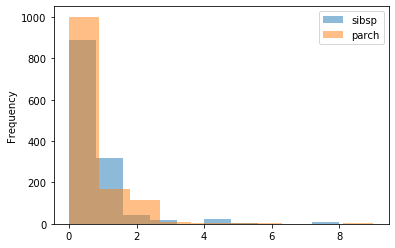

In [7]:
df.sibsp.plot.hist(legend=True, alpha=.5)
df.parch.plot.hist(legend=True, alpha=.5)

The parents/children histogram is higher at 0 and 2, but the sibling/spouse histogram is higher at 1. This makes sense because

1. There were many childless couples on the Titanic (i.e., 0 children).
2. You can only have 1 spouse, but many children travel with 2 parents.

### Densities

Another way to visualize the distribution of a quantitative variable is by plotting its **density**. A density plot turns the jagged histogram into a smooth curve, allowing the user to focus on the general shape of the distribution.

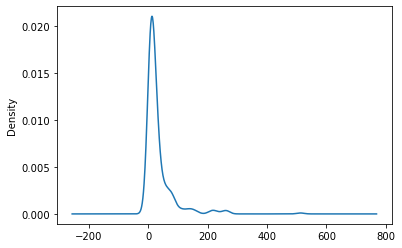

In [8]:
df.fare.plot.density()

The x-axis is too wide. (You cannot have negative fares.) We can set the limits of the x-axis manually using the `xlim` argument.

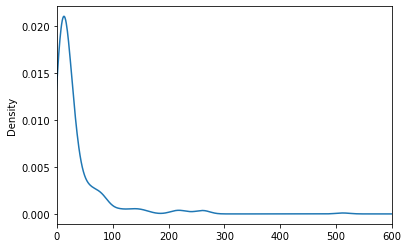

In [9]:
df.fare.plot.density(xlim=(0, 600))

Let's superimpose this density curve on top of the histogram, by making two calls to plotting functions:

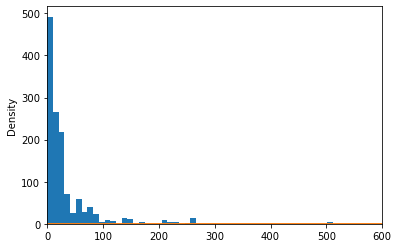

In [10]:
df.fare.plot.hist(bins=50)
df.fare.plot.density(xlim=(0, 600))

If you squint at this plot, you will see an orange line at the bottom of the plot. This is supposed to be the density. But why does it appear as a flat line? The y-axis offers a hint. When we made the density plot earlier, the y-axis extended from 0 to about 0.02. Now the y-axis extends all the way to 500. On such a scale, a curve that fluctuates between 0 and 0.02 will appear to be a flat line!

The problem is that the histogram and the density are currently on different scales. By default, histograms display counts, while densities are defined so that the total area under the curve is 1. To be able to display a histogram and density on the same graph, we have to normalize the histogram so that the total area of the bars is 1. We can do this by setting the option `density=True`.

In [1]:
df.fare.plot.hist(bins=50, denisty=True)
df.fare.plot.density(xlim=(0, 600))

NameError: name 'df' is not defined

Now we can clearly see how the density smooths the histogram. It does a pretty good job for the most part, but it "oversmooths" near 0, missing the spike.

You might wonder what options are available besides `legend`, `alpha`, `bins`, `density`, and `xlim`. Let's look at the documentation for `.plot.hist()`.

In [17]:
df.fare.plot.hist?

The documentation for `.plot.hist()` tells us about one option, `bins`, but then refers us to `.plot()` for additional options. If you peek inside `.plot()`, you will find the `legend`, `density`, and `xlim` options, as well as many others.

In [21]:
df.fare.plot?

Try these out to get a feel for what they do. For example, can you figure out how to make the density curve red in the above graph? Or how to change the size of the figure?

You might be surprised that `alpha` is not listed among the options above. This is because `alpha` is an option of the `matplotlib` plotting method that `pandas` calls. (Notice that the last argument of `.plot()` is `**kwds`, for "options to pass to matplotlib plotting method".)

## Visualizing Categorical Variables

To visualize a categorical variable, we simply need to represent the frequency of each category. We will focus on two types of visualizations for categorical variables: bar graphs and pie charts.

### Bar Graphs

In a **bar graph**, each bar represents a category, and the height of the bar represents the frequency of that category.

`pandas` does not produce a bar graph directly from a categorical variable. In order to make a bar graph, the variable must be in the form of a `Series` whose index is the categories and whose values are the frequencies. This is exactly what we get when we call `.value_counts()` on a categorical variable. 

So making a bar graph requires two steps:
1. Get the frequency of each category using `.value_counts()`.
2. Call `.plot.bar()` on these frequencies.

For example, here is a bar graph showing how many passengers are in each class.

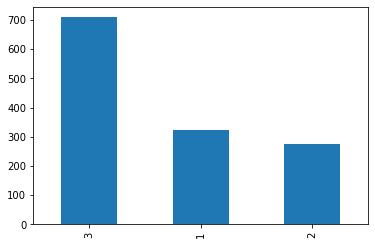

In [22]:
pclass_counts = df.pclass.value_counts()
pclass_counts.plot.bar()

The bar graph makes it clear how many more 3rd class passengers there were than 1st and 2nd class passengers. Bar graphs make it easy to compare categories to each other.

Although bar graphs superficially look similar to histograms (they both have bars), they are not the same. The x-axis on a histogram is a numeric scale, but the x-axis on a bar graph is not, since a bar graph is used to represent categorical variables and the categories are often unordered. For this reason, the bars in a bar graph are typically separated by gaps, to emphasize that the bars do not fall on any particular scale. By contrast, a histogram will not have gaps between the bars, unless there is actually a gap in the data.

The bars in a bar graph are also not guaranteed to be ordered in any particular way. `pandas` will plot the bars in the same order as they appeared in the `Series`. Since `.value_counts()` sorts the categories by frequency, the bar graph was sorted in the same order.

In the case of the passenger class, we probably want the bars in the order 1st, 2nd, 3rd. To do this, we can sort the index of the value counts before passing them to `.plot.bar()`.

1    323
2    277
3    709
Name: pclass, dtype: int64

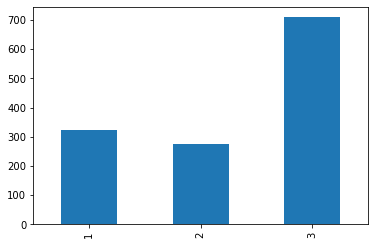

In [23]:
pclass_counts.sort_index(inplace=True)
pclass_counts.plot.bar()
pclass_counts

Sometimes, a bar graph is easier to read if the bars are horizontal instead of vertical. For example, when the labels are long, arranging the bars horizontally allow the labels to be printed left-to-right instead of down-to-up. To make horizontal bars, just add an `h` to the end of `.plot.bar`:

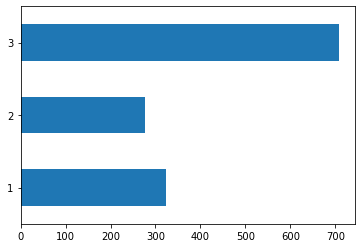

In [24]:
pclass_counts.plot.barh()

### Pie Charts

Pie charts are another way to visualize a categorical variable. Whereas bar graphs make it easy to compare categories to each other, pie charts make it easy to compare a category to the whole.

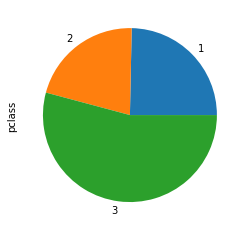

In [25]:
pclass_counts.plot.pie()

It is immediately obvious from this pie chart that 3rd class passengers made up more than half of all passengers on the Titanic. Determining this from the bar graph would have required more mental exertion on the part of the reader.

Again, you can use tab completion to discover more plots that you can make using `pandas`. But beware! Just because a function is available does not mean it's suitable. (For example, `.plot.hist()` makes no sense for a categorical variable.)

# Exercises

All of the following exercises use the Tips data set (`./data/tips.csv`).

**Exercise 1.** Make a graphic that shows the distribution of total bills. Explain what you see.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


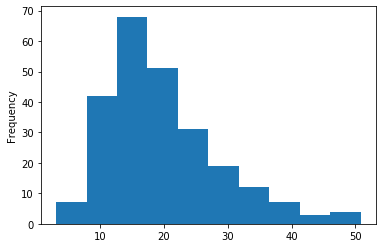

In [44]:
tips = pd.read_csv("./data/tips.csv")
tips
tips.total_bill.plot.hist()
tips

**Exercise 2.** Make a graphic that shows the number of parties this waiter served on each day of the week. Try to make sure your graphic has the days of the week in the right order, starting from Sunday (this is a bit tricky and there are several ways to do this....)

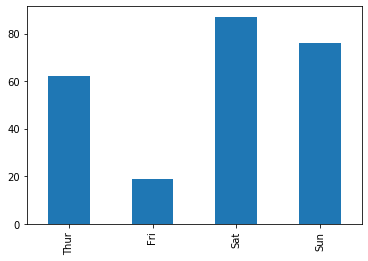

In [31]:
parties = tips.day.value_counts().loc[["Thur", "Fri", "Sat","Sun"]]
parties.plot.bar()

**Exercise 3.** The `.plot.box()` command makes a box plot. A box plot is another way to visualize the distribution of a quantitative variable. Make a box plot of the total bills. Which summary statistics can you read off from this graphic? (You may want to refresh your memory about [how box plots are made](http://www.physics.csbsju.edu/stats/box2.html).)

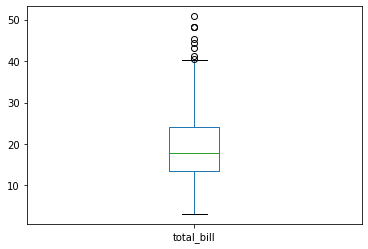

In [34]:
tips.total_bill.plot.box()
#most people spent between $13-$25 but quite a few outliers spent over $40

**Exercise 4.** What happens when you call `.plot.pie()` on a quantitative variable, like `tip`? Why does the pie chart look this way? Do you think pie charts are appropriate for quantitative variables?

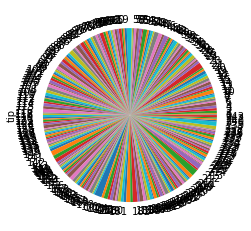

In [35]:
tips.tip.plot.pie()
#the graph made a pie piece for every single value

**Exercise 5.** Make a graphic that shows the distribution of party sizes served by the waiter.

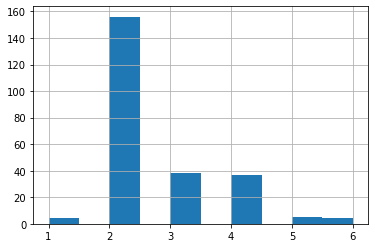

In [58]:
tips["size"].hist()